## Estadistica Aplicada
Sesión 18 - 16 octubre

Jorge Sebastian Aguirre Jimenez 1947870

G41

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
## estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [23]:
plt.rcParams['figure.figsize']=(10,6)

In [14]:
igae_sa=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

In [15]:
igae_sa

,meses,IGAE_DESES
0,1993/01,56.282290
1,1993/02,57.708594
2,1993/03,57.825254
3,1993/04,57.179522
4,1993/05,57.895451
...,...,...
362,2023/03,102.032776
363,2023/04,102.735045
364,2023/05,102.924688
365,2023/06,103.438087


In [16]:
igae_sa['meses']=pd.to_datetime(igae_sa['meses'],format='%Y/%m')

In [17]:
## Hacer que el mes sea el index
igae_sa=igae_sa.set_index('meses')

In [18]:
igae_sa=igae_sa.asfreq('MS')

ARIMA (SERIE SIN EFECTO ESTACIONARIO)

SARIMA (SERIES CON COMPONENTE ESTACIONARIO)

Text(0.5, 1.0, 'IGAE desestacionalizado 1993-2023')

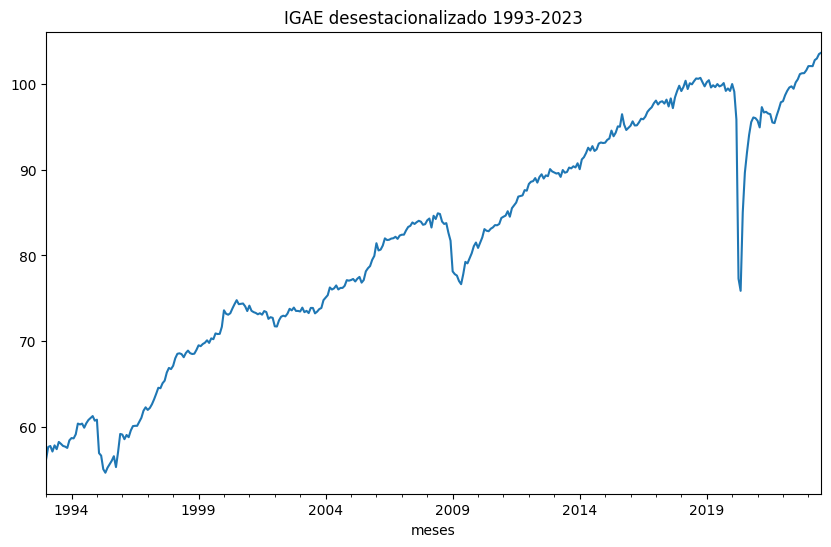

In [24]:
igae_sa['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')

In [27]:
## prueba de Dickey-fuller aumentada
# Ho: No estacionario
# H1: Estacionario
df_test=adfuller(igae_sa['IGAE_DESES'])
pvalue=df_test[1]
pvalue

0.7352896929912629

In [28]:
## Como pvalue es menor a alfa=0.05 entonces No rechazamos Ho y por lo tanto es No estacionaria

In [29]:
# Hacer la serie estacionaria
igae_sa['igae_diff']=igae_sa['IGAE_DESES'].diff()

<Axes: xlabel='meses'>

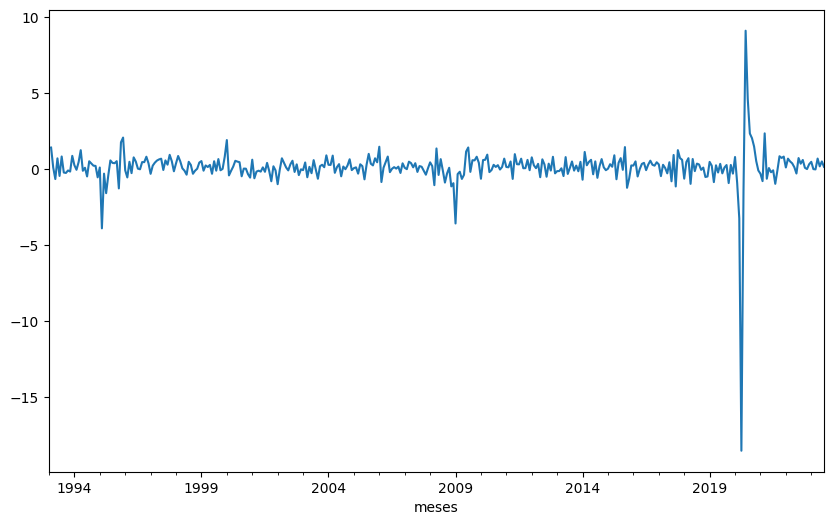

In [30]:
igae_sa['igae_diff'].plot()

In [33]:
## corroborar las primeras diferencias son estacionarias
df_test1=adfuller(igae_sa['igae_diff'].dropna())
pvalue1=df_test1[1]
pvalue1.round(3)

0.0

Rechazamos H0 significa que las primeras diferencias del igae son estacionarias

IGAE I(1)
Primeras diferencias I(0)

(-1.0, 1.0)

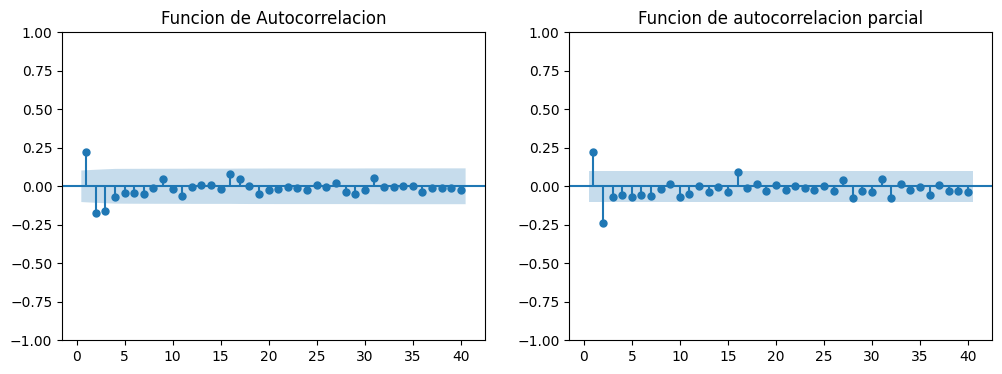

In [41]:
# Graficas de autocorrelacion y de autocorrelacion parcial
ig, ax=plt.subplots(1,2,figsize=(12,4))
plot_acf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[0],title='Funcion de Autocorrelacion')
ax[0].set_ylim(-1,1)
plot_pacf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[1], title='Funcion de autocorrelacion parcial')
ax[1].set_ylim(-1,1)

In [42]:
modelo_prueba= ARIMA(igae_sa['igae_diff'].dropna(), order=(1, 0, 0))
resultadop=modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Mon, 16 Oct 2023   AIC                           1210.530
Time:                        16:25:41   BIC                           1222.238
Sample:                    02-01-1993   HQIC                          1215.182
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

Este es el modelo de prueba AR(1)
$$ Y_t = 0.2219 Y_{t-1}+\varepsilon_t $$

In [47]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae_sa['igae_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4
AR: 4, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 2
AR: 5, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
ic.sort_values('AIC', ascending=True)

AIC          BIC
AR MA                          
3  1   1183.372566  1206.788366
1  4   1184.843160  1212.161593
3  2   1184.880297  1212.198730
4  1   1185.021103  1212.339536
1  5   1186.229362  1217.450429
   2   1186.316694  1205.829861
2  4   1186.638622  1217.859688
3  3   1186.730845  1217.951912
5  1   1186.855985  1218.077052
4  2   1187.146824  1218.367891
1  3   1187.415090  1210.830890
2  2   1187.655051  1211.070851
1  6   1187.912552  1223.036252
6  1   1188.297784  1223.421484
3  6   1188.305905  1231.234872
4  3   1188.608436  1223.732136
2  1   1188.692731  1208.205898
   5   1188.781269  1223.904969
5  2   1189.014715  1224.138415
2  3   1189.183880  1216.502314
0  4   1189.375837  1212.791637
   3   1189.688976  1209.202143
2  6   1189.991402  1229.017735
0  5   1190.171591  1217.490024
5  3   1190.574029  1229.600362
6  2   1190.722022  1229.748356
3  5   1190.724978  1229.751311
2  0   1191.378555  1206.989088
5  4   1191.421166  1234.350133
4  6   1191.704263  1238.535863
3  0   1191.708073  1211.221239
0  6   1191.716873  1222.937940
5  6   1192.105717  1242.839950
6  3   1192.260713  1235.189679
3  4   1192.471324  1227.595024
4  0   1192.619318  1216.035118
5  0   1192.862955  1220.181389
6  4   1193.305266  1240.136866
   0   1193.741006  1224.962073
   6   1194.505973  1249.142839
5  5   1194.566204  1241.397804
4  5   1195.132972  1238.061938
   4   1195.645805  1234.672139
0  2   1198.260034  1213.870567
6  5   1199.988883  1250.723116
1  1   1200.876150  1216.486683
0  1   1200.924033  1212.631933
1  0   1210.529688  1222.237588
0  0   1227.009237  1234.814504

Primeras diferencias es un ARIMA (3,0,1)= ARMA(3,1)

igae_deses ARIMA(3,1,1)